In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [2]:
boston = load_boston()

# Não escalado

In [3]:
X = boston['data']
y = boston['target']
X_scaled = MinMaxScaler().fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.700770938393629

# Escalado

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [7]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6632079052893783

# Polinomial

In [8]:
poly = PolynomialFeatures(degree=2)

In [9]:
X_poly = poly.fit_transform(X_scaled)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

In [11]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8307026371187769

# Regressão Logística

In [12]:
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
clf = LogisticRegression(C=100, solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9694835680751174

# SVM

In [14]:
svc= SVC(kernel='linear', C=2)

In [15]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer)
svc.fit(X_cancer, y_cancer)
svc.score(X_cancer, y_cancer)

0.9630931458699473

# Crossvalidation

# Curva de validação

In [17]:
from sklearn.model_selection import validation_curve

In [29]:
param_range = np.linspace(1, 3, num=5)
train_scores, test_scores = validation_curve(LogisticRegression(solver='lbfgs', max_iter=10000), X, y, param_name='C', param_range=param_range, cv=3)

In [30]:
train_scores

array([[0.96569921, 0.9525066 , 0.97105263],
       [0.96569921, 0.95514512, 0.97105263],
       [0.96833773, 0.95514512, 0.97368421],
       [0.9762533 , 0.95514512, 0.97631579],
       [0.9762533 , 0.9525066 , 0.97631579]])

In [34]:
test_scores

array([[0.94210526, 0.96842105, 0.94708995],
       [0.94210526, 0.96842105, 0.94708995],
       [0.94210526, 0.96315789, 0.94708995],
       [0.94210526, 0.96315789, 0.94708995],
       [0.94210526, 0.96315789, 0.94708995]])

# Árvore de decisão

In [45]:
from sklearn.datasets import load_iris
from sklearn import tree
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt

In [36]:
iris = load_iris()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=3)

In [39]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [41]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9910714285714286

In [44]:
param_range = np.linspace(1,20,20)
train_scores, test_scores = validation_curve(clf, iris.data, iris.target, param_name='max_depth', param_range=param_range, cv=3)

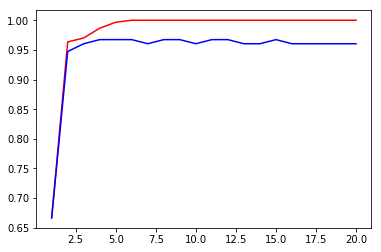

In [47]:
plt.plot(param_range, train_scores.mean(axis=1), 'r-')
plt.plot(param_range, test_scores.mean(axis=1), 'b-')
plt.show()

# One-hot encoding

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

In [54]:
fruits = pd.read_table('fruit.txt')

data = fruits['fruit_subtype']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

[ 4  4  4  5  5  5  5  0  1  1  1  1  1  3  3  3  3  3  2  2  2  2  2  2
  8  8  8  6  6  6  6  6  6  9  9  9  9  9  9  9  9  9  9  7  7  7  7  7
  7 10 10 10 10 10 10 10 10 10 10]


In [55]:
onehor_encoder = OneHotEncoder(sparse=False, categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehor_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.

# Balanceamento de dataset

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38

[[16  0  0]
 [ 0  9  0]
 [ 0  2 11]]


In [63]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'max_depth': [1, 3, 5, 7], 'min_samples_leaf': [1,2,3,4,5], 'max_leaf_nodes':[5,10,15,20]}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3, iid=False, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_leaf_nodes': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [74]:
gs.score(X_test, y_test)

0.9473684210526315

In [75]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
gs.best_params_

{'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}

In [77]:
gs.best_score_

0.9295256795256795

[{'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 1},
 {'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 2},
 {'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 3},
 {'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 4},
 {'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 5},
 {'max_depth': 1, 'max_leaf_nodes': 10, 'min_samples_leaf': 1},
 {'max_depth': 1, 'max_leaf_nodes': 10, 'min_samples_leaf': 2},
 {'max_depth': 1, 'max_leaf_nodes': 10, 'min_samples_leaf': 3},
 {'max_depth': 1, 'max_leaf_nodes': 10, 'min_samples_leaf': 4},
 {'max_depth': 1, 'max_leaf_nodes': 10, 'min_samples_leaf': 5},
 {'max_depth': 1, 'max_leaf_nodes': 15, 'min_samples_leaf': 1},
 {'max_depth': 1, 'max_leaf_nodes': 15, 'min_samples_leaf': 2},
 {'max_depth': 1, 'max_leaf_nodes': 15, 'min_samples_leaf': 3},
 {'max_depth': 1, 'max_leaf_nodes': 15, 'min_samples_leaf': 4},
 {'max_depth': 1, 'max_leaf_nodes': 15, 'min_samples_leaf': 5},
 {'max_depth': 1, 'max_leaf_nodes': 20, 'min_